In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np
import pandas as pd
from scipy.fftpack import fft, fftfreq, fftshift
from scipy.ndimage.interpolation import zoom
import tensorflow as tf
import os

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.4 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: builtins.type size changed, may indicate binary incompatibility. Expected 432, got 412
  return f(*args, **kwds)


In [92]:
def wav2img(data,fs,i):
    
    N=data.shape[0]
    T=1./fs
    if N*T > 10 :
        data=data[:fs*10]
    N=data.shape[0]
    f_data=fft(data)
    yf = fft(data)
    xf = fftfreq(N, T)
    xf = fftshift(xf)
    f_plot = fftshift(yf)
    xf=xf[int(N/2)-1:]
    f_plot=f_plot[int(N/2)-1:]
    #plt.xlim((20,20000))
    #plt.ylim((0,0))
    N=f_plot.shape[0]
    #plt.plot(xf, 1.0/N * np.abs(f_plot))
    
    x_r=zoom(xf,4900./N)
    f_r=zoom(1.0/N * np.abs(f_plot),4900./N)
    plt.plot(x_r, f_r)
    
    image_f=x_r.reshape(70,70)
    image=f_r.reshape(70,70)
    image=image/image.max()
    #plt.figure()
    #plt.imshow(image)
    #plt.colorbar()
    #plt.grid(False)
    #plt.legend(str(i))
    plt.show()
    return image

In [93]:
filepath='/home/pi/Documents/project/Dog_sound/'

In [94]:
folder_list=os.listdir(filepath)
print(folder_list)
len(folder_list)

['nervous', 'happy', 'help', 'bark(pending)', 'angry', 'stress', '.DS_Store', 'sad']


8

In [99]:
test=np.array((3,70,70))

1


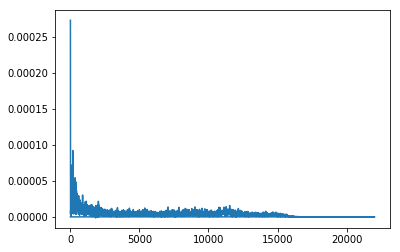

IndexError: too many indices for array

In [103]:
for i in range(1,4):
    print(i)
    #data, fs = sf.read(filepath+'stress/howling'+str(i)+'.wav', dtype='float32')
    data, fs = sf.read(filepath+'happy/happy'+str(i)+'.wav')#, dtype='float32')
    data_angry=wav2img(data[:,0],fs,i)
    test[i-1,:,:]=data_angry

In [102]:
data_angry.shape

(70, 70)

In [88]:
test=np.array((3,70,70,1))

In [89]:
type(test)

numpy.ndarray